In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
X = np.zeros((150,2))
X[:50, 0] = np.random.normal(loc=0.0, scale=0.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=0.3, size=50)

X[50:100, 0] = np.random.normal(loc=1.0, scale=0.4, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=0.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=0.4, size=50)
X[100:150, 1] = np.random.normal(loc=1.0, scale=0.6, size=50)

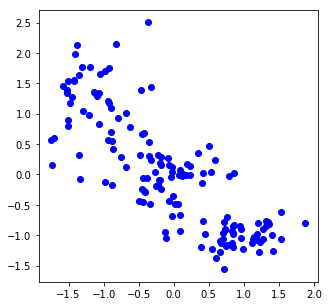

In [41]:
plt.figure(figsize=(5,5))
plt.plot(X[:,0], X[:,1], 'bo')

In [46]:
from scipy.spatial.distance import cdist

np.random.seed(seed=6)
centroids = np.random.normal(loc=0.0, scale=1.,size=6)
centroids = centroids.reshape((3,2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    distance = cdist(X, centroids)
    labels = distance.argmin(axis=1)
    
    centroids = centorids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)
    
    cent_history.append(centroids)

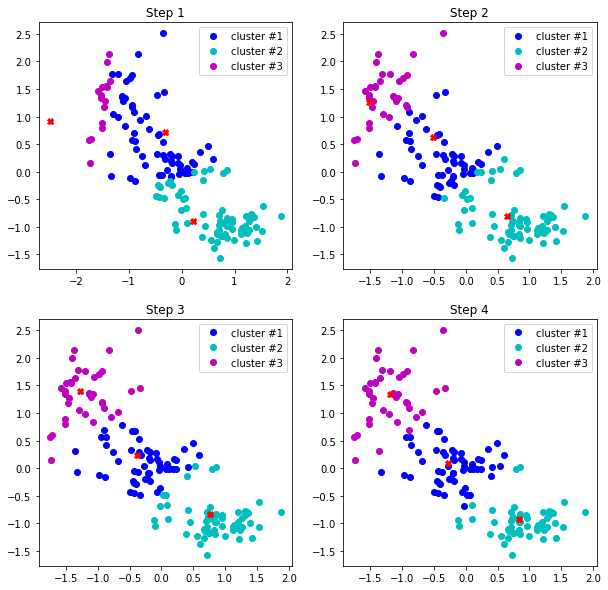

In [47]:
plt.figure(figsize=(10,10))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1));

In [56]:
import numpy as np

In [38]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris_df = datasets.load_iris()

print(dir(iris_df))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [42]:
print(iris_df.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [58]:
sets = np.array(iris_df)
sets

array({'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],

In [43]:
print(iris_df.target_names)

['setosa' 'versicolor' 'virginica']


In [45]:
print(iris_df.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(*args, **kw)>

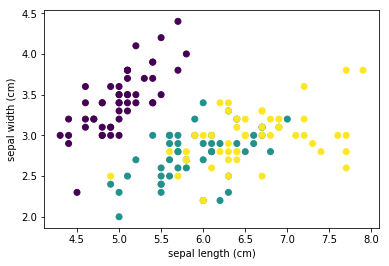

In [48]:
x_axis = iris_df.data[:, 0]
y_axis = iris_df.data[:, 1]

plt.xlabel(iris_df.feature_names[0])
plt.ylabel(iris_df.feature_names[1])
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show

In [49]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [52]:
iris_df = datasets.load_iris()

model = KMeans(n_clusters=3)

model.fit(iris_df.data)

predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

all_predictions = model.predict(iris_df.data)

print(predicted_label)
print(all_predictions)

[1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
seeds_df = pd.read_csv('D:/Prog/ML/Large dataset/interesting data sets/qps_ru.csv')

In [35]:
seeds_df.head(10)

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama wheat
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,Kama wheat
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,Kama wheat
5,13.02,13.76,0.8641,5.395,3.026,3.373,4.825,Kama wheat
6,15.49,14.94,0.8724,5.757,3.371,3.412,5.228,Kama wheat
7,16.20,15.27,0.8734,5.826,3.464,2.823,5.527,Kama wheat
8,13.50,13.85,0.8852,5.351,3.158,2.249,5.176,Kama wheat
9,15.36,14.76,0.8861,5.701,3.393,1.367,5.132,Kama wheat


In [36]:
varieties = list(seeds_df.pop('grain_variety'))

samples = seeds_df.values

mergings = linkage(samples, method='complete')

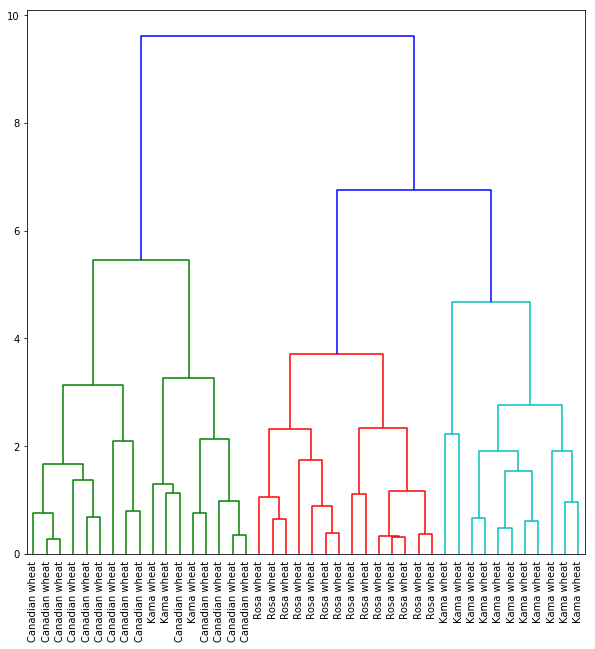

In [18]:
plt.figure(figsize=(10,10))
dendrogram(mergings, labels=varieties, leaf_rotation=90, leaf_font_size=10)
plt.show()

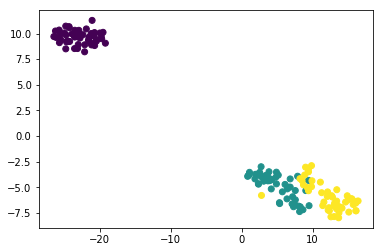

In [60]:
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

iris_df = datasets.load_iris()

model = TSNE(learning_rate=100)

transformed = model.fit_transform(iris_df.data)

x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

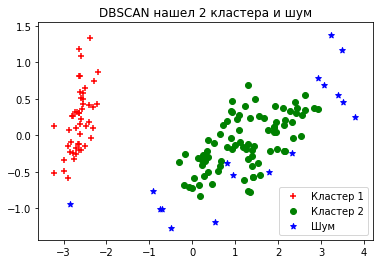

In [61]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
 
# Загружаем датасет
iris = load_iris()
 
# Определяем модель
dbscan = DBSCAN()
 
# Обучаем
dbscan.fit(iris.data)
 
# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)
 
# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
 
plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()